In [84]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../data/salary_data_cleaned.csv")

In [4]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,job_state,same_state,age_of_company,Python,ML,DL,Spark,AWS,Excel,MS
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,NM,0,51,1,1,0,0,0,1,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,MD,0,40,1,1,0,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,FL,1,14,1,1,1,1,0,1,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,WA,1,59,1,1,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,NY,1,26,1,1,0,0,0,1,0


In [5]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer', 'min_salary', 'max_salary', 'avg_salary',
       'company_name', 'job_state', 'same_state', 'age_of_company', 'Python',
       'ML', 'DL', 'Spark', 'AWS', 'Excel', 'MS'],
      dtype='object')

In [6]:
# Job title and seniority
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower():
        return 'jr'
    else:
        return 'na'

In [7]:
df['job_title'] = df['Job Title'].apply(title_simplifier)
df['job_title'].value_counts()

job_title
data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: count, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)
df['seniority'].value_counts()

seniority
na        519
senior    220
jr          3
Name: count, dtype: int64

In [9]:
# Fix state Los Angels
df["job_state"].value_counts()
df['job_state'] = df['job_state'].apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df["job_state"].value_counts()

job_state
CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: count, dtype: int64

In [10]:
# Job descripition length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2555
1      4828
2      3495
3      3926
4      2748
       ... 
737    6219
738    6167
739    3107
740    1678
741    3710
Name: desc_len, Length: 742, dtype: int64

In [11]:
# Competitor count
df['comp_count'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df['comp_count']

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: comp_count, Length: 742, dtype: int64

In [12]:
# Hourly wage to annual
df['min_salary'] = df.apply(lambda x: x['min_salary']*2 if x.hourly == 1 else x['min_salary'], axis=1)
df['max_salary'] = df.apply(lambda x: x['max_salary']*2 if x.hourly == 1 else x['max_salary'], axis=1)

In [13]:
df[df['hourly'] == 1][['hourly', 'min_salary', 'max_salary']].head()

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50


In [14]:
df.describe()

,Rating,Founded,hourly,employer,min_salary,max_salary,avg_salary,same_state,age_of_company,Python,ML,DL,Spark,AWS,Excel,MS,desc_len,comp_count
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,50.322102,0.528302,0.501348,0.400270,0.225067,0.237197,0.522911,0.086253,3910.172507,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,54.026459,0.499535,0.500335,0.490283,0.417908,0.425651,0.499812,0.280927,1533.827777,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2834.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,28.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3781.500000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,63.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4772.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,280.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10146.000000,4.000000


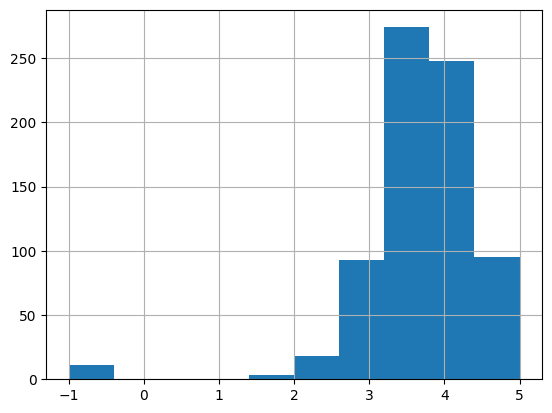

In [15]:
df['Rating'].hist();

<Axes: >

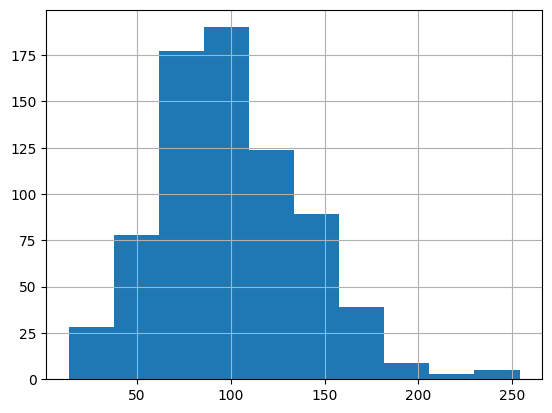

In [16]:
df['avg_salary'].hist()

<Axes: >

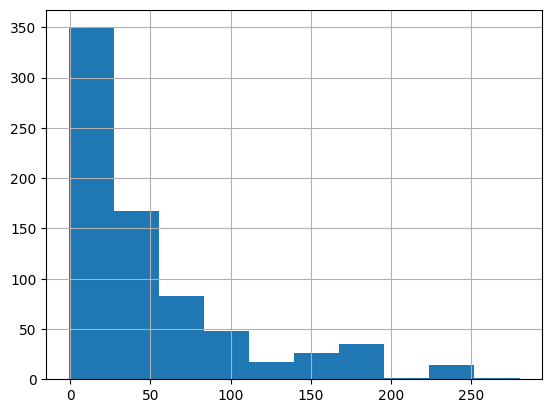

In [17]:
df['age_of_company'].hist()

<Axes: >

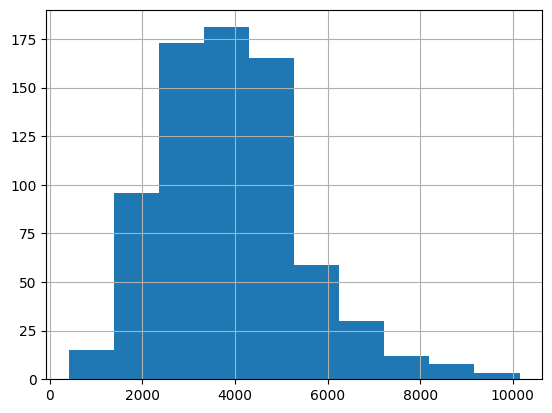

In [18]:
df['desc_len'].hist()

<Axes: >

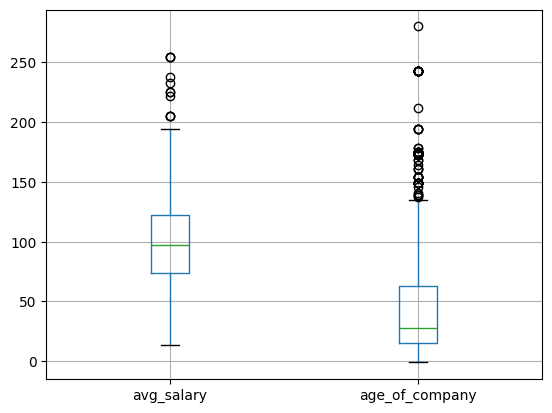

In [19]:
df[['avg_salary', 'age_of_company']].boxplot()

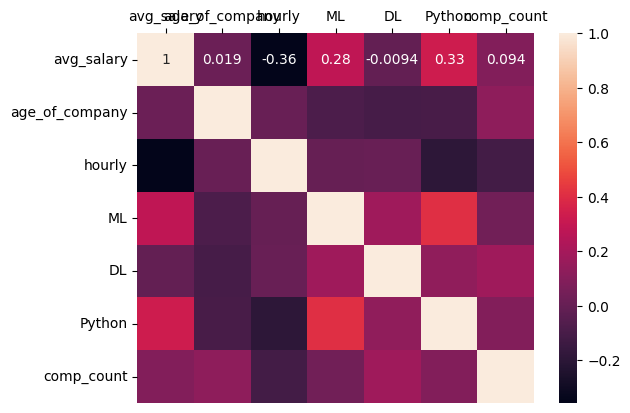

In [21]:
ax = sns.heatmap(df[['avg_salary', 'age_of_company', 'hourly', 'ML', 'DL', 'Python', 'comp_count']].corr(), annot=True)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

In [22]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer', 'min_salary', 'max_salary', 'avg_salary',
       'company_name', 'job_state', 'same_state', 'age_of_company', 'Python',
       'ML', 'DL', 'Spark', 'AWS', 'Excel', 'MS', 'job_title', 'seniority',
       'desc_len', 'comp_count'],
      dtype='object')

In [63]:
df_cat = df.select_dtypes(object)
df_cat = pd.concat([df_cat, pd.DataFrame(df[['Python']])], axis=1)
df_cat

,Job Title,Salary Estimate,Job Description,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,Competitors,company_name,job_state,job_title,seniority,Python
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,Tecolote Research,NM,data scientist,na,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,University of Maryland Medical System,MD,data scientist,na,1
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,KnowBe4,FL,data scientist,na,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",PNNL,WA,data scientist,na,1
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",Affinity Solutions,NY,data scientist,na,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\r\n...,GSK\r\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Pfizer, AstraZeneca, Merck",GSK,MA,na,senior,0
738,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\r\nEventbrite has a world-class ...,Eventbrite\r\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",Eventbrite,TN,data engineer,senior,1
739,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,Software Engineering Institute\r\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1,Software Engineering Institute,PA,na,na,0
740,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\r\n\r\nO...,"Numeric, LLC\r\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,"Numeric, LLC",PA,manager,na,0


graph for Job Description: total = 9


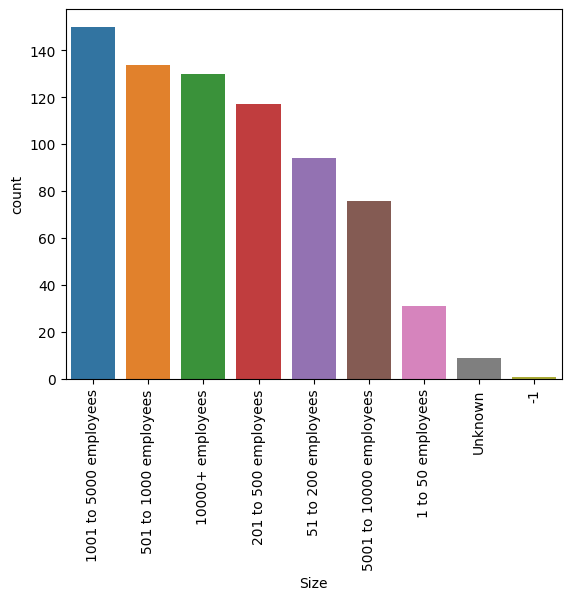

graph for Job Description: total = 37


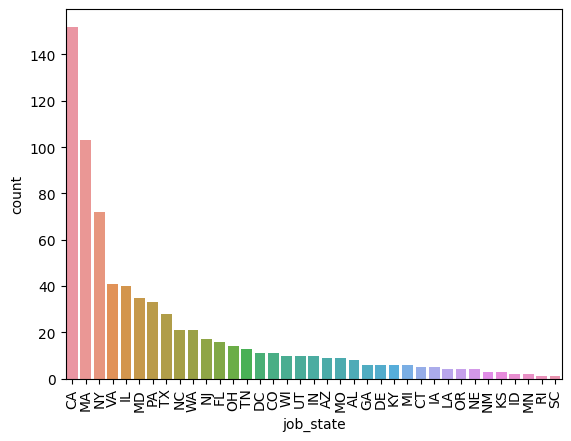

graph for Job Description: total = 7


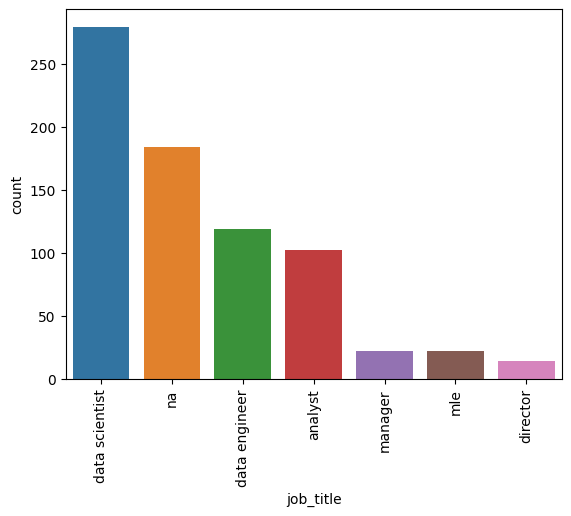

graph for Job Description: total = 11


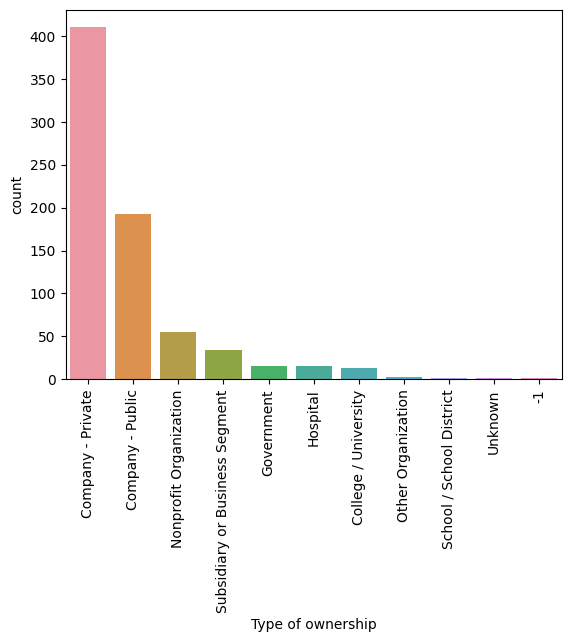

graph for Job Description: total = 25


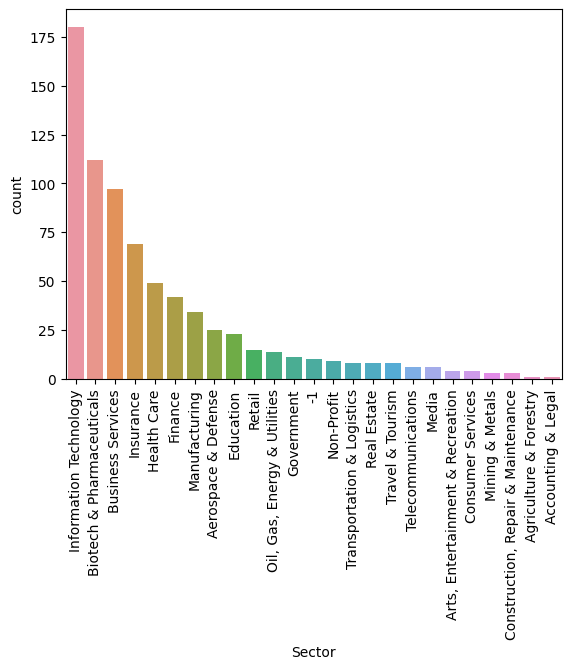

graph for Job Description: total = 14


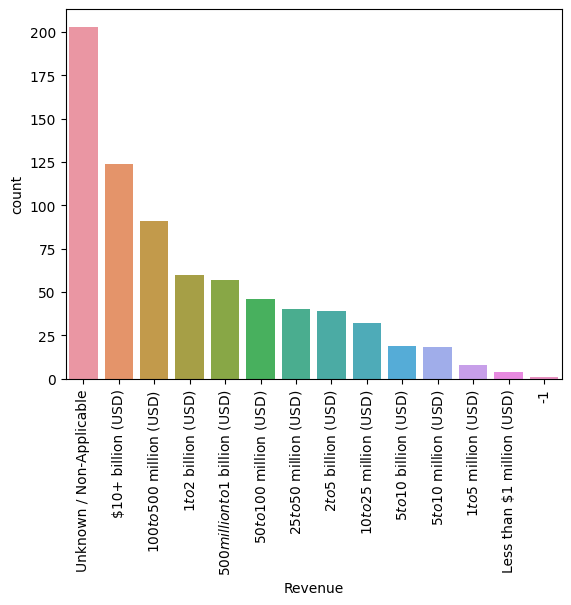

graph for Job Description: total = 2


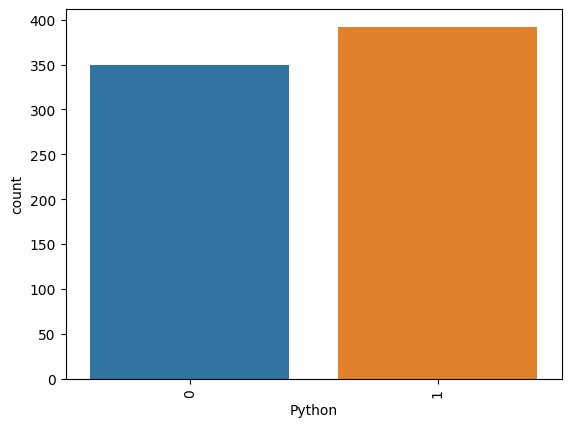

In [62]:
some_cat = ["Size", "job_state", "job_title", "Type of ownership", "Sector", "Revenue", "Python"]
for col in some_cat:
    cat_num = df_cat[col].value_counts()
    print("graph for %s: total = %d" % (i, df_cat[col].nunique()))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

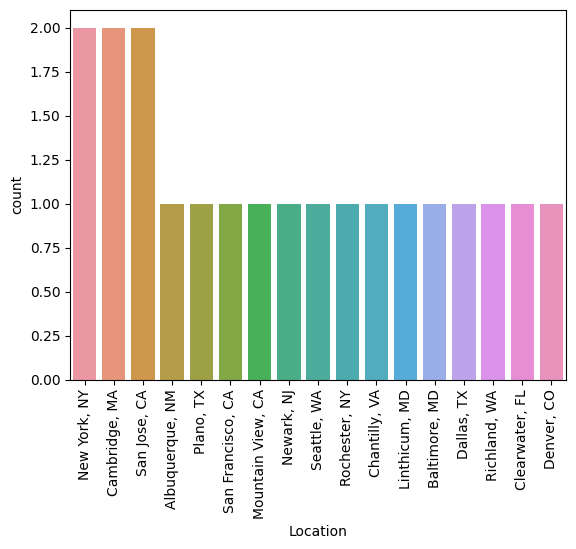

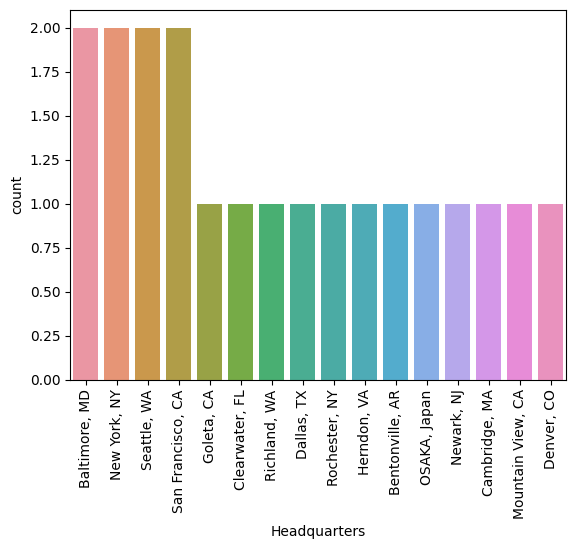

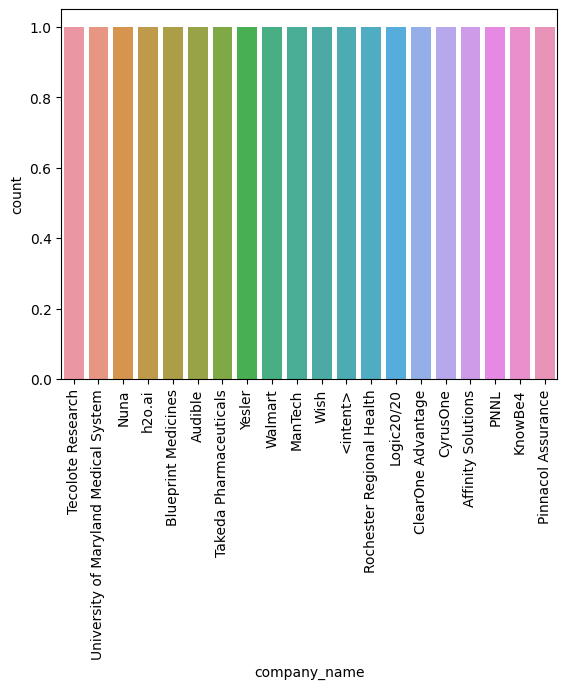

In [66]:
for col_name in df[['Location', 'Headquarters', 'company_name']].columns:
    col_num = df[col_name][:20].value_counts()
    chart = sns.barplot(x=col_num.index, y=col_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [83]:
df["avg_salary"].groupby(df["job_title"]).agg(['mean', 'median', 'max', 'min'])

,mean,median,max,min
job_title,,,,
analyst,65.857843,61.00,173.0,13.5
data engineer,105.403361,100.00,205.0,58.5
data scientist,117.564516,113.50,237.5,15.5
director,168.607143,166.75,254.0,53.0
manager,84.022727,66.25,221.5,40.5
mle,126.431818,124.00,232.5,87.0
na,84.853261,81.25,174.0,20.0


In [94]:
pd.pivot_table(df, index=['job_title', 'seniority'], values='avg_salary')

avg_salary
job_title      seniority            
analyst        jr          53.250000
               na          61.308219
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [101]:
pd.set_option('display.max_rows', None)
pd.pivot_table(df, index=['job_state', 'job_title'], values='avg_salary', aggfunc='count').sort_values(by='job_state', ascending=False)

avg_salary
job_state job_title                 
WI        na                       4
          data scientist           3
          analyst                  3
WA        na                       1
          data scientist          17
          analyst                  3
VA        na                       5
          mle                      2
          data scientist          18
          data engineer           10
          analyst                  6
UT        data engineer            3
          analyst                  4
          data scientist           3
TX        na                       7
          data scientist          13
          data engineer            8
TN        data scientist           1
          data engineer           10
          analyst                  2
SC        na                       1
RI        analyst                  1
PA        manager                  3
          data engineer            1
          data scientist           6
          analyst                  8
          mle                      7
          na                       8
OR        data scientist           3
          data engineer            1
OH        na                       3
          data scientist           7
          analyst                  4
NY        na                      12
          mle                      2
          data scientist          40
          data engineer            4
          analyst                 14
NM        data scientist           3
NJ        data scientist           4
          analyst                  6
          data engineer            2
          manager                  2
          director                 2
          na                       1
NE        na                       4
NC        na                      12
          data scientist           3
          data engineer            6
MO        na                       3
          manager                  1
          data scientist           3
          analyst                  2
MN        data engineer            1
          analyst                  1
MI        manager                  2
          data scientist           4
MD        na                      16
          data scientist          13
          data engineer            3
          analyst                  3
MA        na                      46
          manager                  5
          director                 6
          data scientist          30
          data engineer           12
          analyst                  4
LA        analyst                  1
          data engineer            2
          na                       1
KY        na                       4
          data scientist           2
KS        mle                      3
IN        na                       4
          data scientist           2
          data engineer            4
IL        analyst                  3
          na                       6
          mle                      2
          director                 6
          data scientist          15
          data engineer            8
ID        analyst                  2
IA        analyst                  2
          data engineer            3
GA        data scientist           3
          na                       3
FL        data scientist           7
          data engineer            3
          analyst                  6
DE        na                       6
DC        data scientist           5
          data engineer            4
          analyst                  2
CT        na                       3
          data scientist           2
CO        mle                      1
          data engineer            3
          analyst                  1
          na                       3
          data scientist           3
CA        na                      27
          mle                      5
          manager                  9
          data scientist          68
          data engineer           25
          analyst             

In [106]:
pd.pivot_table(df[df['job_title'] == 'data scientist'], index='job_state', values='avg_salary').sort_values('avg_salary', ascending=False)

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [107]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer', 'min_salary', 'max_salary', 'avg_salary',
       'company_name', 'job_state', 'same_state', 'age_of_company', 'Python',
       'ML', 'DL', 'Spark', 'AWS', 'Excel', 'MS', 'job_title', 'seniority',
       'desc_len', 'comp_count'],
      dtype='object')

In [119]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'hourly', 'Python', 'Spark', 'AWS', 'Excel', 'avg_salary']]

In [143]:
for col in df_pivots.columns[:-1]:
    print(col)
    print(pd.concat([a, pd.pivot_table(df_pivots, index=col, values='avg_salary').sort_values('avg_salary', ascending=False)], axis=0))

Rating
                                           avg_salary
 0.0                                       102.953390
 1.0                                        98.502577
-1.0                                       136.181818
 5.0                                       134.700000
 2.5                                       120.000000
 4.5                                       117.714286
 4.1                                       116.368421
 3.9                                       113.071429
 2.6                                       109.083333
 4.4                                       108.606061
 3.2                                       105.500000
 4.0                                       105.340426
 3.5                                       104.897959
 3.7                                       104.131148
 4.7                                       103.983871
 4.3                                       102.468750
 3.3                                       101.858974
 4.2                 

In [156]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\khaled\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\khaled\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

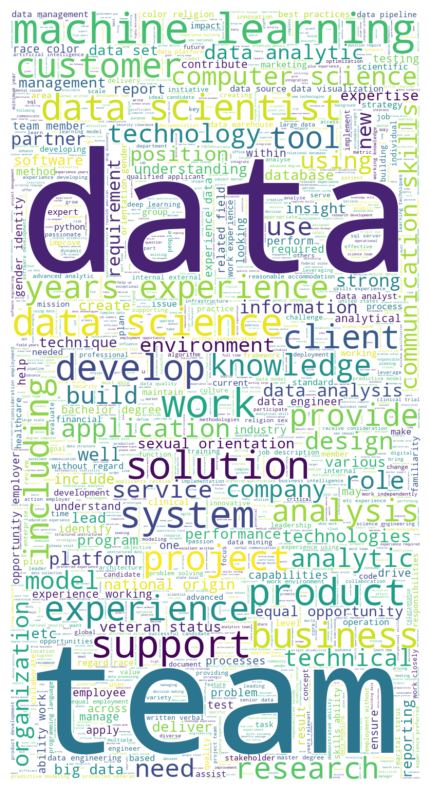

In [159]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    "Remove punctuation and stop words"
    filtered = []
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)

text = " ".join([e for e in words_filtered])

wc = WordCloud(background_color="white", random_state=1, stopwords=STOPWORDS, max_words=2000, width=800, height=1500)
wc.generate(text)

plt.figure(figsize=[10, 10])
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()